## Initialization

In [ ]:
# ruff: noqa:I001, T201

In [1]:
import platform
import cpuinfo
import sys

import polars as pl
import pyarrow as pa
import pandas as pd
import numba as nb

import xlsx2csv
import openpyxl
import pyxlsb
import python_calamine as calamine

import recordclass
import tqdm as _tqdm
import lxml

import memory_profiler

from rxls.reader import read as xl_scan
from tqdm import tqdm

cpu: dict = cpuinfo.get_cpu_info()

print(
    f'[{"=":=^120}]',
    f'|{" benchmark environment used ":^120}|',
    f'[{" system ":=^24}][{" property ":=^94}]',
    *[
        f'|{f" {name} ":^24}||{f" {version} ":^94}|'
        for name, version in {
            "Platform": platform.platform(),
            "CPU": platform.processor(),
            "CPU HZ": f'{cpu["hz_advertised_friendly"]} (actual: {cpu["hz_actual_friendly"]})',
            "Python": sys.version,
        }.items()
    ],
    f'[{" dependency ":=^24}][{" version ":=^94}]',
    *[
        f'|{f" {name} ":^24}||{f" {version} ":^94}|'
        for name, version in {
            "PyArrow": pa.__version__,
            "Polars": pl.__version__,
            "Pandas": pd.__version__,
            "Numba": nb.__version__,
            "XLSX2CSV": xlsx2csv.__version__,
            "OpenPyXL": openpyxl.__version__,
            "PyXLSB": pyxlsb.__version__,
            "python_calamine": "0.1.7",  # On 2024-01-20 this package has no `__version__` attribute
            "tqdm": _tqdm.__version__,
            "recordclass": recordclass.__version__,
            "lxml": lxml.__version__,
            "cpuinfo": ".".join(map(str, cpuinfo.CPUINFO_VERSION)),
            "memory_profiler": memory_profiler.__version__,
        }.items()
    ],
    f'[{"=":=^24}][{"=":=^94}]',
    sep="\n",
)

[========================================================================================================================]
|                                               benchmark environment used                                               |
[======== system ========][========================================== property ==========================================]
|        Platform        ||                                  Windows-10-10.0.19044-SP0                                   |
|          CPU           ||                      AMD64 Family 23 Model 17 Stepping 0, AuthenticAMD                       |
|         CPU HZ         ||                               2.4950 GHz (actual: 2.5000 GHz)                                |
|         Python         ||       3.8.10 (tags/v3.8.10:3d8993a, May  3 2021, 11:48:03) [MSC v.1928 64 bit (AMD64)]       |
[====== dependency ======][========================================== version ===========================================]
|        PyArrow

## DataSource:

Our World In Data: COVID-19

https://github.com/owid/covid-19-data/raw/cd68c0641d0837adb62c2ed3146459a593aa776a/public/data/owid-covid-data.csv

**I've download this, and save with MS Excel to .xlsx and .xlsb formats using `Legacy` text import wizard (keep errors in columns)**

In [2]:
# Original CSV file and converted XLSX/XLSB datasets saved in `benchmarks.datasets.7z`
XLSX_FILE = "covid.xlsx"
XLSB_FILE = "covid.xlsb"

In [3]:
from IPython.core.display import display_html


def show_df(df: pl.DataFrame) -> None:
    print(f"rows: {df.height} columns: {df.width}")
    display_html(df.head())

### RXLS. Scan both xlsx and xlsb (*plain = convert all columns to utf8*)

In [4]:
def scan_rxls_xlsx_plain(path: str = XLSX_FILE) -> pl.DataFrame:
    return pl.from_arrow(xl_scan(path, header=True, dtypes=pa.large_string()))  # type: ignore


def scan_rxls_xlsb_plain(path: str = XLSB_FILE) -> pl.DataFrame:
    return pl.from_arrow(xl_scan(path, header=True, dtypes=pa.large_string()))  # type: ignore


def scan_rxls_xlsx(path: str = XLSX_FILE) -> pl.DataFrame:
    return pl.from_arrow(xl_scan(path, header=True))  # type: ignore


def scan_rxls_xlsb(path: str = XLSB_FILE) -> pl.DataFrame:
    return pl.from_arrow(xl_scan(path, header=True))  # type: ignore

In [10]:
show_df(scan_rxls_xlsx_plain())
# 2m 2.2s (276700 rows, 67 columns)

rows: 276700 columns: 67


iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""AFG""","""Asia""","""Afghanistan""","""2020-01-05 00:…",null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""","""2024-06-18 00:…","""2.581""","""1.337""","""1803.987""",null,"""597.029""","""1959-09-01 00:…",null,null,"""37.746""","""0.5""","""64.83""","""0.511""","""41128772.0""",null,null,null,null
"""AFG""","""Asia""","""Afghanistan""","""2020-01-12 00:…",null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""","""2024-06-18 00:…","""2.581""","""1.337""","""1803.987""",null,"""597.029""","""1959-09-01 00:…",null,null,"""37.746""","""0.5""","""64.83""","""0.511""","""41128772.0""",null,null,null,null
"""AFG""","""Asia""","""Afghanistan""","""2020-01-19 00:…",null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""","""2024-06-18 00:…","""2.581""","""1.337""","""1803.987""",null,"""597.029""","""1959-09-01 00:…",null,null,"""37.746""","""0.5""","""64.83""","""0.511""","""41128772.0""",null,null,null,null
"""AFG""","""Asia""","""Afghanistan""","""2020-01-26 00:…",null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""","""2024-06-18 00:…","""2.581""","""1.337""","""1803.987""",null,"""597.029""","""1959-09-01 00:…",null,null,"""37.746""","""0.5""","""64.83""","""0.511""","""41128772.0""",null,null,null,null
"""AFG""","""Asia""","""Afghanistan""","""2020-02-02 00:…",null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"

In [10]:
show_df(scan_rxls_xlsb_plain())
# 1m 28.0s (276700 rows, 67 columns)

rows: 276700 columns: 67


iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""AFG""","""Asia""","""Afghanistan""","""2020-01-05 00:…",null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""","""2024-06-18 00:…","""2.581""","""1.337""","""1803.987""",null,"""597.029""","""1959-09-01 00:…",null,null,"""37.746""","""0.5""","""64.83""","""0.511""","""41128772.0""",null,null,null,null
"""AFG""","""Asia""","""Afghanistan""","""2020-01-12 00:…",null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""","""2024-06-18 00:…","""2.581""","""1.337""","""1803.987""",null,"""597.029""","""1959-09-01 00:…",null,null,"""37.746""","""0.5""","""64.83""","""0.511""","""41128772.0""",null,null,null,null
"""AFG""","""Asia""","""Afghanistan""","""2020-01-19 00:…",null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""","""2024-06-18 00:…","""2.581""","""1.337""","""1803.987""",null,"""597.029""","""1959-09-01 00:…",null,null,"""37.746""","""0.5""","""64.83""","""0.511""","""41128772.0""",null,null,null,null
"""AFG""","""Asia""","""Afghanistan""","""2020-01-26 00:…",null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""","""2024-06-18 00:…","""2.581""","""1.337""","""1803.987""",null,"""597.029""","""1959-09-01 00:…",null,null,"""37.746""","""0.5""","""64.83""","""0.511""","""41128772.0""",null,null,null,null
"""AFG""","""Asia""","""Afghanistan""","""2020-02-02 00:…",null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"

In [10]:
show_df(scan_rxls_xlsx())
# 2m 3.7s (276700 rows, 67 columns)

rows: 276700 columns: 67


iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
str,str,str,datetime[ms],str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""AFG""","""Asia""","""Afghanistan""",2020-01-05 00:00:00,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""","""2024-06-18 00:…","""2.581""","""1.337""","""1803.987""",null,"""597.029""","""1959-09-01 00:…",null,null,"""37.746""","""0.5""","""64.83""","""0.511""","""41128772.0""",null,null,null,null
"""AFG""","""Asia""","""Afghanistan""",2020-01-12 00:00:00,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""","""2024-06-18 00:…","""2.581""","""1.337""","""1803.987""",null,"""597.029""","""1959-09-01 00:…",null,null,"""37.746""","""0.5""","""64.83""","""0.511""","""41128772.0""",null,null,null,null
"""AFG""","""Asia""","""Afghanistan""",2020-01-19 00:00:00,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""","""2024-06-18 00:…","""2.581""","""1.337""","""1803.987""",null,"""597.029""","""1959-09-01 00:…",null,null,"""37.746""","""0.5""","""64.83""","""0.511""","""41128772.0""",null,null,null,null
"""AFG""","""Asia""","""Afghanistan""",2020-01-26 00:00:00,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""","""2024-06-18 00:…","""2.581""","""1.337""","""1803.987""",null,"""597.029""","""1959-09-01 00:…",null,null,"""37.746""","""0.5""","""64.83""","""0.511""","""41128772.0""",null,null,null,null
"""AFG""","""Asia""","""Afghanistan""",2020-02-02 00:00:00,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,nu

In [10]:
show_df(scan_rxls_xlsb())
# 10m 29.5s (341376 rows, 67 columns)

rows: 276700 columns: 67


iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
str,str,str,datetime[ms],str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""AFG""","""Asia""","""Afghanistan""",2020-01-05 00:00:00,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""","""2024-06-18 00:…","""2.581""","""1.337""","""1803.987""",null,"""597.029""","""1959-09-01 00:…",null,null,"""37.746""","""0.5""","""64.83""","""0.511""","""41128772.0""",null,null,null,null
"""AFG""","""Asia""","""Afghanistan""",2020-01-12 00:00:00,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""","""2024-06-18 00:…","""2.581""","""1.337""","""1803.987""",null,"""597.029""","""1959-09-01 00:…",null,null,"""37.746""","""0.5""","""64.83""","""0.511""","""41128772.0""",null,null,null,null
"""AFG""","""Asia""","""Afghanistan""",2020-01-19 00:00:00,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""","""2024-06-18 00:…","""2.581""","""1.337""","""1803.987""",null,"""597.029""","""1959-09-01 00:…",null,null,"""37.746""","""0.5""","""64.83""","""0.511""","""41128772.0""",null,null,null,null
"""AFG""","""Asia""","""Afghanistan""",2020-01-26 00:00:00,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""","""2024-06-18 00:…","""2.581""","""1.337""","""1803.987""",null,"""597.029""","""1959-09-01 00:…",null,null,"""37.746""","""0.5""","""64.83""","""0.511""","""41128772.0""",null,null,null,null
"""AFG""","""Asia""","""Afghanistan""",2020-02-02 00:00:00,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,nu

### XLSX2CSV case: xlsx -> csv -> polars.read_csv()

In [5]:
def scan_xlsx2csv(path: str = XLSX_FILE) -> pl.DataFrame:
    return pl.read_excel(
        path,
        engine="xlsx2csv",
        # NOTE: This parameters only needs, because of mixed dtype columns
        read_csv_options={"has_header": True, "infer_schema_length": 0},
    )

In [10]:
# NOTE: It's fine, but date columns have incorrect datatype, and are not ISO-dates.
show_df(scan_xlsx2csv())
# 2m 15s  (276700 rows, 67 columns)

rows: 276700 columns: 67


iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""AFG""","""Asia""","""Afghanistan""","""01-05-20""",null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""","""18-Jun""","""2.581""","""1.337""","""1803.987""",null,"""597.029""","""Sep-59""",null,null,"""37.746""","""0.5""","""64.83""","""0.511""","""41128772.0""",null,null,null,null
"""AFG""","""Asia""","""Afghanistan""","""01-12-20""",null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""","""18-Jun""","""2.581""","""1.337""","""1803.987""",null,"""597.029""","""Sep-59""",null,null,"""37.746""","""0.5""","""64.83""","""0.511""","""41128772.0""",null,null,null,null
"""AFG""","""Asia""","""Afghanistan""","""01-19-20""",null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""","""18-Jun""","""2.581""","""1.337""","""1803.987""",null,"""597.029""","""Sep-59""",null,null,"""37.746""","""0.5""","""64.83""","""0.511""","""41128772.0""",null,null,null,null
"""AFG""","""Asia""","""Afghanistan""","""01-26-20""",null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""","""18-Jun""","""2.581""","""1.337""","""1803.987""",null,"""597.029""","""Sep-59""",null,null,"""37.746""","""0.5""","""64.83""","""0.511""","""41128772.0""",null,null,null,null
"""AFG""","""Asia""","""Afghanistan""","""02-02-20""",null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""","""18-Jun""","""2.581""","""1.337""","""1803.987""",null,""

### OpenPyXL: Scan xlsx only

In [6]:
def scan_openpyxl(path: str = XLSX_FILE) -> pl.DataFrame:
    return pl.read_excel(path, engine="openpyxl")

In [10]:
# NOTE: median_age column has missing data.
show_df(scan_openpyxl())
# 6m 51.1s  (276700 rows, 67 columns)

rows: 276700 columns: 67


iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
str,str,str,datetime[μs],str,str,str,str,str,str,str,str,str,str,str,str,datetime[μs],str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,datetime[μs],str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,datetime[μs],str,str,str,datetime[μs],str,datetime[μs],datetime[μs],str,str,str,str,str,str,str,str,datetime[μs],str
"""AFG""","""Asia""","""Afghanistan""",2020-01-05 00:00:00,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""",2024-06-18 00:00:00,"""2.581""","""1.337""","""1803.987""",null,"""597.029""",1959-09-01 00:00:00,null,null,"""37.746""","""0.5""","""64.83""","""0.511""","""41128772.0""",null,null,null,null
"""AFG""","""Asia""","""Afghanistan""",2020-01-12 00:00:00,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""",2024-06-18 00:00:00,"""2.581""","""1.337""","""1803.987""",null,"""597.029""",1959-09-01 00:00:00,null,null,"""37.746""","""0.5""","""64.83""","""0.511""","""41128772.0""",null,null,null,null
"""AFG""","""Asia""","""Afghanistan""",2020-01-19 00:00:00,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""",2024-06-18 00:00:00,"""2.581""","""1.337""","""1803.987""",null,"""597.029""",1959-09-01 00:00:00,null,null,"""37.746""","""0.5""","""64.83""","""0.511""","""41128772.0""",null,null,null,null
"""AFG""","""Asia""","""Afghanistan""",2020-01-26 00:00:00,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""",2024-06-18 00:00:00,"""2.581""","""1.337""","""1803.987""",null,"""597.029""",1959-09-01 00:00:00,null,null,"""37.746""","""0.5""","""64.83""","""0.511""","""41128772.0""",null,null,null,null
"""AFG""","""Asia""","""Afghanistan""",2020-02-02 00:00:00,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null

### PyXLSB: Scan xlsb only

In [7]:
def scan_pyxlsb(path: str = XLSB_FILE) -> pl.DataFrame:
    return pl.read_excel(path, engine="pyxlsb")

In [10]:
# NOTE: pyxlsb not recognized dates automatically - you can do this manually, but xl/styles.bin parsing required.
show_df(scan_pyxlsb())
# 2m 56.2s  (276700 rows, 67 columns)

rows: 276700 columns: 67


iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
str,str,str,f64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""AFG""","""Asia""","""Afghanistan""",43835.0,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""",null,"""2.581""","""1.337""","""1803.987""",null,"""597.029""",null,null,null,"""37.746""","""0.5""","""64.83""","""0.511""","""41128772.0""",null,null,null,null
"""AFG""","""Asia""","""Afghanistan""",43842.0,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""",null,"""2.581""","""1.337""","""1803.987""",null,"""597.029""",null,null,null,"""37.746""","""0.5""","""64.83""","""0.511""","""41128772.0""",null,null,null,null
"""AFG""","""Asia""","""Afghanistan""",43849.0,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""",null,"""2.581""","""1.337""","""1803.987""",null,"""597.029""",null,null,null,"""37.746""","""0.5""","""64.83""","""0.511""","""41128772.0""",null,null,null,null
"""AFG""","""Asia""","""Afghanistan""",43856.0,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""",null,"""2.581""","""1.337""","""1803.987""",null,"""597.029""",null,null,null,"""37.746""","""0.5""","""64.83""","""0.511""","""41128772.0""",null,null,null,null
"""AFG""","""Asia""","""Afghanistan""",43863.0,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""",null,"""2.581""","""1.337""","""1803.987""",null,"""597.029""",null,null,null,"""37.746""","""0.5""","""64.83""","""0.511""","""41128772.0""",null,null,null,n

### Calamine: Scan both xlsx and xlsb

In [8]:
def scan_calamine(path: str = XLSB_FILE, *, tq: bool = False) -> pl.DataFrame:
    wb: calamine.CalamineWorkbook = calamine.load_workbook(path)
    ws = wb.get_sheet_by_index(0)

    row_it = iter(ws.to_python(skip_empty_area=False))

    head = [
        col_header
        if cell[1] is not None and (col_header := str(cell[1]).strip())
        else f"Unnamed: {cell[0]}"
        for cell in enumerate(next(row_it))
    ]
    schema = dict.fromkeys(head, pl.Utf8)

    data_it = ([str(cell) if cell else None for cell in row] for row in row_it)
    if tq:
        data_it = tqdm(data_it)

    return pl.DataFrame(list(data_it), schema, orient="row")


In [10]:
show_df(scan_calamine(XLSX_FILE))
# 38.3s  (276700 rows, 67 columns)

rows: 276700 columns: 67


iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""AFG""","""Asia""","""Afghanistan""","""2020-01-05""",null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""","""2024-06-18""","""2.581""","""1.337""","""1803.987""",null,"""597.029""","""1959-09-01""",null,null,"""37.746""","""0.5""","""64.83""","""0.511""","""41128772.0""",null,null,null,null
"""AFG""","""Asia""","""Afghanistan""","""2020-01-12""",null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""","""2024-06-18""","""2.581""","""1.337""","""1803.987""",null,"""597.029""","""1959-09-01""",null,null,"""37.746""","""0.5""","""64.83""","""0.511""","""41128772.0""",null,null,null,null
"""AFG""","""Asia""","""Afghanistan""","""2020-01-19""",null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""","""2024-06-18""","""2.581""","""1.337""","""1803.987""",null,"""597.029""","""1959-09-01""",null,null,"""37.746""","""0.5""","""64.83""","""0.511""","""41128772.0""",null,null,null,null
"""AFG""","""Asia""","""Afghanistan""","""2020-01-26""",null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""","""2024-06-18""","""2.581""","""1.337""","""1803.987""",null,"""597.029""","""1959-09-01""",null,null,"""37.746""","""0.5""","""64.83""","""0.511""","""41128772.0""",null,null,null,null
"""AFG""","""Asia""","""Afghanistan""","""2020-02-02""",null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""","""2024-06-18""",

In [10]:
show_df(scan_calamine())
# 21.6s  (276700 rows, 67 columns)

rows: 276700 columns: 67


iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""AFG""","""Asia""","""Afghanistan""","""2020-01-05""",null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""","""2024-06-18""","""2.581""","""1.337""","""1803.987""",null,"""597.029""","""1959-09-01""",null,null,"""37.746""","""0.5""","""64.83""","""0.511""","""41128772.0""",null,null,null,null
"""AFG""","""Asia""","""Afghanistan""","""2020-01-12""",null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""","""2024-06-18""","""2.581""","""1.337""","""1803.987""",null,"""597.029""","""1959-09-01""",null,null,"""37.746""","""0.5""","""64.83""","""0.511""","""41128772.0""",null,null,null,null
"""AFG""","""Asia""","""Afghanistan""","""2020-01-19""",null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""","""2024-06-18""","""2.581""","""1.337""","""1803.987""",null,"""597.029""","""1959-09-01""",null,null,"""37.746""","""0.5""","""64.83""","""0.511""","""41128772.0""",null,null,null,null
"""AFG""","""Asia""","""Afghanistan""","""2020-01-26""",null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""","""2024-06-18""","""2.581""","""1.337""","""1803.987""",null,"""597.029""","""1959-09-01""",null,null,"""37.746""","""0.5""","""64.83""","""0.511""","""41128772.0""",null,null,null,null
"""AFG""","""Asia""","""Afghanistan""","""2020-02-02""",null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""","""2024-06-18""",

## Benchmarks

### Timeit

*For these tests, I've reload kernel between tests, for better consistency*

In [10]:
%%time
scan_xlsx2csv().head()

CPU times: total: 2min 7s
Wall time: 2min 15s


iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""AFG""","""Asia""","""Afghanistan""","""01-05-20""",null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""","""18-Jun""","""2.581""","""1.337""","""1803.987""",null,"""597.029""","""Sep-59""",null,null,"""37.746""","""0.5""","""64.83""","""0.511""","""41128772.0""",null,null,null,null
"""AFG""","""Asia""","""Afghanistan""","""01-12-20""",null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""","""18-Jun""","""2.581""","""1.337""","""1803.987""",null,"""597.029""","""Sep-59""",null,null,"""37.746""","""0.5""","""64.83""","""0.511""","""41128772.0""",null,null,null,null
"""AFG""","""Asia""","""Afghanistan""","""01-19-20""",null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""","""18-Jun""","""2.581""","""1.337""","""1803.987""",null,"""597.029""","""Sep-59""",null,null,"""37.746""","""0.5""","""64.83""","""0.511""","""41128772.0""",null,null,null,null
"""AFG""","""Asia""","""Afghanistan""","""01-26-20""",null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""","""18-Jun""","""2.581""","""1.337""","""1803.987""",null,"""597.029""","""Sep-59""",null,null,"""37.746""","""0.5""","""64.83""","""0.511""","""41128772.0""",null,null,null,null
"""AFG""","""Asia""","""Afghanistan""","""02-02-20""",null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""","""18-Jun""","""2.581""","""1.337""","""1803.987""",null,""

In [10]:
%%time
scan_openpyxl().head()

CPU times: total: 5min 36s
Wall time: 6min 37s


iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
str,str,str,datetime[μs],str,str,str,str,str,str,str,str,str,str,str,str,datetime[μs],str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,datetime[μs],str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,datetime[μs],str,str,str,datetime[μs],str,datetime[μs],datetime[μs],str,str,str,str,str,str,str,str,datetime[μs],str
"""AFG""","""Asia""","""Afghanistan""",2020-01-05 00:00:00,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""",2024-06-18 00:00:00,"""2.581""","""1.337""","""1803.987""",null,"""597.029""",1959-09-01 00:00:00,null,null,"""37.746""","""0.5""","""64.83""","""0.511""","""41128772.0""",null,null,null,null
"""AFG""","""Asia""","""Afghanistan""",2020-01-12 00:00:00,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""",2024-06-18 00:00:00,"""2.581""","""1.337""","""1803.987""",null,"""597.029""",1959-09-01 00:00:00,null,null,"""37.746""","""0.5""","""64.83""","""0.511""","""41128772.0""",null,null,null,null
"""AFG""","""Asia""","""Afghanistan""",2020-01-19 00:00:00,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""",2024-06-18 00:00:00,"""2.581""","""1.337""","""1803.987""",null,"""597.029""",1959-09-01 00:00:00,null,null,"""37.746""","""0.5""","""64.83""","""0.511""","""41128772.0""",null,null,null,null
"""AFG""","""Asia""","""Afghanistan""",2020-01-26 00:00:00,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""",2024-06-18 00:00:00,"""2.581""","""1.337""","""1803.987""",null,"""597.029""",1959-09-01 00:00:00,null,null,"""37.746""","""0.5""","""64.83""","""0.511""","""41128772.0""",null,null,null,null
"""AFG""","""Asia""","""Afghanistan""",2020-02-02 00:00:00,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null

In [10]:
%%time
scan_pyxlsb().head()

CPU times: total: 2min 33s
Wall time: 2min 43s


iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
str,str,str,f64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""AFG""","""Asia""","""Afghanistan""",43835.0,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""",null,"""2.581""","""1.337""","""1803.987""",null,"""597.029""",null,null,null,"""37.746""","""0.5""","""64.83""","""0.511""","""41128772.0""",null,null,null,null
"""AFG""","""Asia""","""Afghanistan""",43842.0,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""",null,"""2.581""","""1.337""","""1803.987""",null,"""597.029""",null,null,null,"""37.746""","""0.5""","""64.83""","""0.511""","""41128772.0""",null,null,null,null
"""AFG""","""Asia""","""Afghanistan""",43849.0,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""",null,"""2.581""","""1.337""","""1803.987""",null,"""597.029""",null,null,null,"""37.746""","""0.5""","""64.83""","""0.511""","""41128772.0""",null,null,null,null
"""AFG""","""Asia""","""Afghanistan""",43856.0,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""",null,"""2.581""","""1.337""","""1803.987""",null,"""597.029""",null,null,null,"""37.746""","""0.5""","""64.83""","""0.511""","""41128772.0""",null,null,null,null
"""AFG""","""Asia""","""Afghanistan""",43863.0,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""",null,"""2.581""","""1.337""","""1803.987""",null,"""597.029""",null,null,null,"""37.746""","""0.5""","""64.83""","""0.511""","""41128772.0""",null,null,null,n

In [10]:
%%time
scan_calamine(XLSB_FILE).head()

CPU times: total: 18.3 s
Wall time: 21.3 s


iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""AFG""","""Asia""","""Afghanistan""","""2020-01-05""",null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""","""2024-06-18""","""2.581""","""1.337""","""1803.987""",null,"""597.029""","""1959-09-01""",null,null,"""37.746""","""0.5""","""64.83""","""0.511""","""41128772.0""",null,null,null,null
"""AFG""","""Asia""","""Afghanistan""","""2020-01-12""",null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""","""2024-06-18""","""2.581""","""1.337""","""1803.987""",null,"""597.029""","""1959-09-01""",null,null,"""37.746""","""0.5""","""64.83""","""0.511""","""41128772.0""",null,null,null,null
"""AFG""","""Asia""","""Afghanistan""","""2020-01-19""",null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""","""2024-06-18""","""2.581""","""1.337""","""1803.987""",null,"""597.029""","""1959-09-01""",null,null,"""37.746""","""0.5""","""64.83""","""0.511""","""41128772.0""",null,null,null,null
"""AFG""","""Asia""","""Afghanistan""","""2020-01-26""",null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""","""2024-06-18""","""2.581""","""1.337""","""1803.987""",null,"""597.029""","""1959-09-01""",null,null,"""37.746""","""0.5""","""64.83""","""0.511""","""41128772.0""",null,null,null,null
"""AFG""","""Asia""","""Afghanistan""","""2020-02-02""",null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""","""2024-06-18""",

In [10]:
%%time
scan_calamine(XLSX_FILE).head()

CPU times: total: 33.9 s
Wall time: 36.5 s


iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""AFG""","""Asia""","""Afghanistan""","""2020-01-05""",null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""","""2024-06-18""","""2.581""","""1.337""","""1803.987""",null,"""597.029""","""1959-09-01""",null,null,"""37.746""","""0.5""","""64.83""","""0.511""","""41128772.0""",null,null,null,null
"""AFG""","""Asia""","""Afghanistan""","""2020-01-12""",null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""","""2024-06-18""","""2.581""","""1.337""","""1803.987""",null,"""597.029""","""1959-09-01""",null,null,"""37.746""","""0.5""","""64.83""","""0.511""","""41128772.0""",null,null,null,null
"""AFG""","""Asia""","""Afghanistan""","""2020-01-19""",null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""","""2024-06-18""","""2.581""","""1.337""","""1803.987""",null,"""597.029""","""1959-09-01""",null,null,"""37.746""","""0.5""","""64.83""","""0.511""","""41128772.0""",null,null,null,null
"""AFG""","""Asia""","""Afghanistan""","""2020-01-26""",null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""","""2024-06-18""","""2.581""","""1.337""","""1803.987""",null,"""597.029""","""1959-09-01""",null,null,"""37.746""","""0.5""","""64.83""","""0.511""","""41128772.0""",null,null,null,null
"""AFG""","""Asia""","""Afghanistan""","""2020-02-02""",null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""","""2024-06-18""",

In [10]:
%%time
scan_rxls_xlsx().head()

CPU times: total: 2min 4s
Wall time: 2min 6s


iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
str,str,str,datetime[ms],str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""AFG""","""Asia""","""Afghanistan""",2020-01-05 00:00:00,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""","""2024-06-18 00:…","""2.581""","""1.337""","""1803.987""",null,"""597.029""","""1959-09-01 00:…",null,null,"""37.746""","""0.5""","""64.83""","""0.511""","""41128772.0""",null,null,null,null
"""AFG""","""Asia""","""Afghanistan""",2020-01-12 00:00:00,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""","""2024-06-18 00:…","""2.581""","""1.337""","""1803.987""",null,"""597.029""","""1959-09-01 00:…",null,null,"""37.746""","""0.5""","""64.83""","""0.511""","""41128772.0""",null,null,null,null
"""AFG""","""Asia""","""Afghanistan""",2020-01-19 00:00:00,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""","""2024-06-18 00:…","""2.581""","""1.337""","""1803.987""",null,"""597.029""","""1959-09-01 00:…",null,null,"""37.746""","""0.5""","""64.83""","""0.511""","""41128772.0""",null,null,null,null
"""AFG""","""Asia""","""Afghanistan""",2020-01-26 00:00:00,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""","""2024-06-18 00:…","""2.581""","""1.337""","""1803.987""",null,"""597.029""","""1959-09-01 00:…",null,null,"""37.746""","""0.5""","""64.83""","""0.511""","""41128772.0""",null,null,null,null
"""AFG""","""Asia""","""Afghanistan""",2020-02-02 00:00:00,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,nu

In [10]:
%%time
scan_rxls_xlsb().head()

CPU times: total: 1min 24s
Wall time: 1min 41s


iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
str,str,str,datetime[ms],str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""AFG""","""Asia""","""Afghanistan""",2020-01-05 00:00:00,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""","""2024-06-18 00:…","""2.581""","""1.337""","""1803.987""",null,"""597.029""","""1959-09-01 00:…",null,null,"""37.746""","""0.5""","""64.83""","""0.511""","""41128772.0""",null,null,null,null
"""AFG""","""Asia""","""Afghanistan""",2020-01-12 00:00:00,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""","""2024-06-18 00:…","""2.581""","""1.337""","""1803.987""",null,"""597.029""","""1959-09-01 00:…",null,null,"""37.746""","""0.5""","""64.83""","""0.511""","""41128772.0""",null,null,null,null
"""AFG""","""Asia""","""Afghanistan""",2020-01-19 00:00:00,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""","""2024-06-18 00:…","""2.581""","""1.337""","""1803.987""",null,"""597.029""","""1959-09-01 00:…",null,null,"""37.746""","""0.5""","""64.83""","""0.511""","""41128772.0""",null,null,null,null
"""AFG""","""Asia""","""Afghanistan""",2020-01-26 00:00:00,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""0.0""","""54.422""","""2024-06-18 00:…","""2.581""","""1.337""","""1803.987""",null,"""597.029""","""1959-09-01 00:…",null,null,"""37.746""","""0.5""","""64.83""","""0.511""","""41128772.0""",null,null,null,null
"""AFG""","""Asia""","""Afghanistan""",2020-02-02 00:00:00,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,"""0.0""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,nu

### Memory Profiler

*For these tests, I've reload kernel between tests, for better consistency*

In [9]:
%load_ext memory_profiler

In [10]:
%memit scan_rxls_xlsb()

peak memory: 1657.45 MiB, increment: 1480.03 MiB


In [10]:
%memit scan_rxls_xlsx()

peak memory: 1926.55 MiB, increment: 1748.77 MiB


In [10]:
%memit scan_xlsx2csv()

peak memory: 581.82 MiB, increment: 404.13 MiB


In [10]:
%memit scan_openpyxl()

peak memory: 4489.82 MiB, increment: 4312.04 MiB


In [10]:
%memit scan_pyxlsb()

peak memory: 2160.24 MiB, increment: 1982.36 MiB


In [10]:
%memit scan_calamine(XLSX_FILE)

peak memory: 3169.70 MiB, increment: 2992.27 MiB


In [10]:
%memit scan_calamine(XLSB_FILE)

peak memory: 3185.12 MiB, increment: 3007.87 MiB


## Results

### Time Performance Stats (XLSX)

| Engine | Wall Time | CPU Time    |  Score |
|--------|-----------|-------------|--------|
|Calamine| 36.5 s | 33.9 s | 1 |
|  RXLS  | 2min 6s | 2min 4s | 2 |
|XLSX2CSV| 2min 15s | 2min 7s | 3 |
|OpenPyXL| 6min 37s | 5min 36s | 4 |

### Time Performance Stats (XLSB)

| Engine | Wall Time | CPU Time    |  Score |
|--------|-----------|-------------|--------|
|Calamine| 21.3 s | 18.3 s | 1 |
|  RXLS  | 1min 41s | 1min 24s | 2 |
| PyXLSB | 2min 43s | 2min 33s | 3 |


### Memory Performance Stats (XLSX)

| Engine | Peak Memory |  Increment  | Score |
|--------|-------------|-------------|-------|
|XLSXCSV |  581.82 MiB |  404.13 MiB | 1 |
|  RXLS  | 1926.55 MiB | 1748.77 MiB | 2 |
|Calamine| 3169.70 MiB | 2992.27 MiB | 3 |
|OpenPyXL| 4489.82 MiB | 4312.04 MiB | 4 |

### Memory Performance Stats (XLSB)

| Engine | Peak Memory |  Increment  | Score |
|--------|-------------|-------------|-------|
|  RXLS  | 1926.55 MiB | 1748.77 MiB | 1 |
| PyXLSB | 2160.24 MiB | 1982.36 MiB | 2 |
|Calamine| 3185.12 MiB | 3007.87 MiB | 3 |


In [ ]:
from datetime import time
import polars as pl
import hvplot

hvplot.extension("matplotlib")

df_bench_xlsx = pl.DataFrame(
    {
        "Engine": ["Calamine", "RXLS", "XLSX2CSV", "OpenPyXL"],
        "Wall": [
            time(0, 0, 36, 500000),
            time(0, 2, 6),
            time(0, 2, 15),
            time(0, 6, 37),
        ],
        "CPU": [
            time(0, 0, 33, 900000),
            time(0, 2, 4),
            time(0, 2, 7),
            time(0, 5, 36),
        ],
        "Peak": [3169.70, 1926.55, 581.82, 4489.82],
        "Increment": [2992.27, 1748.77, 404.13, 4312.04],
    }
).with_columns(
    # nanoseconds to minutes
    pl.col("Wall").cast(pl.Int64) / 60000000000,
    pl.col("CPU").cast(pl.Int64) / 60000000000,
)

df_bench_xlsb = pl.DataFrame(
    {
        "Engine": ["Calamine", "RXLS", "PyXLSB"],
        "Wall": [
            time(0, 0, 21, 300000),
            time(0, 1, 41),
            time(0, 2, 43),
        ],
        "CPU": [
            time(0, 0, 18, 300000),
            time(0, 1, 24),
            time(0, 2, 43),
        ],
        "Peak": [3185.12, 1926.55, 2160.24],
        "Increment": [3007.87, 1748.77, 1982.36],
    }
).with_columns(
    # nanoseconds to minutes
    pl.col("Wall").cast(pl.Int64) / 60000000000,
    pl.col("CPU").cast(pl.Int64) / 60000000000,
)


:Bars   [Engine,Variable]   (value)
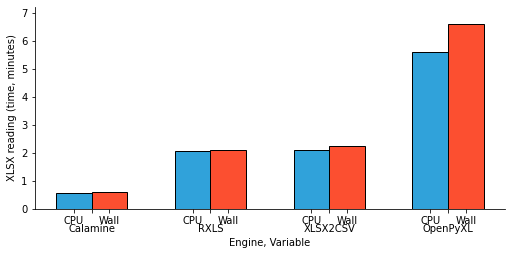

In [47]:
df_bench_xlsx.sort("Wall", descending=False).plot.bar(
    y=["Wall", "CPU"], x="Engine", ylabel="XLSX reading (time, minutes)"
)


:Bars   [Engine,Variable]   (value)
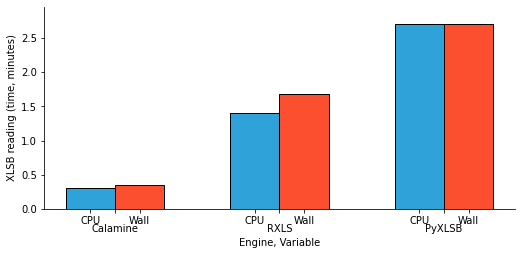

In [48]:
df_bench_xlsb.sort("Wall", descending=False).plot.bar(
    y=["Wall", "CPU"], x="Engine", ylabel="XLSB reading (time, minutes)"
)


:Bars   [Engine,Variable]   (value)
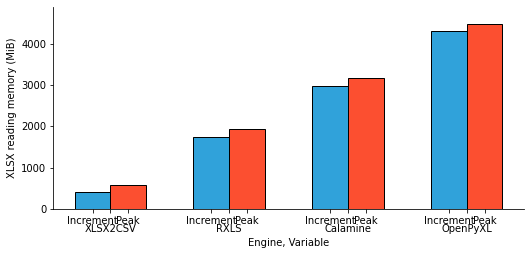

In [49]:
df_bench_xlsx.sort("Increment", descending=False).plot.bar(
    y=["Peak", "Increment"], stacked=False, x="Engine", ylabel='XLSX reading memory (MiB)'
)


:Bars   [Engine,Variable]   (value)
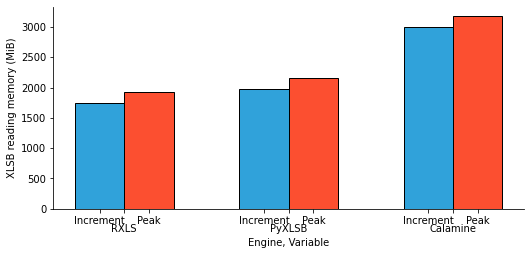

In [50]:
df_bench_xlsb.sort("Increment", descending=False).plot.bar(
    y=["Peak", "Increment"], stacked=False, x="Engine", ylabel='XLSB reading memory (MiB)'
)


### Notes about benchmark:

* RXLS performance increases significantly since previous commit of this benchmark.
* Previous benchmark was on slower system, so there is large performance boost for all engines.
* Add python-calamine engine to benchmark
* There is only one case of reading files (whole file reading). In different cases, there may be some benefits from using one engine or another.
* You can test RXLS with `TBB` along with `Numba` for even better performance increase. There is no such tests, because of other engines use only CPU (as I know).
* OpenPyXL eats all my RAM, as always. So, keep this in mind, that on another machine it may take even more memory, than in benchmarks.
* Original files size:
    - XLSX: 45894952 bytes (~43.7 MB)
    - XLSB: 20125767 bytes (~19.1 MB)
* For each testing case (time or memit magic cell execution), kernel was restarted.
* *Maybe, some optimisations missed in Polars openpyxl adapter: `read-only workbooks, data-only mode` (?)*

### Notes about data

Almost all columns in original files have some errors, such as:

- Mixed data types (timestamps and floating-point cells in one column)

This is a special case for show you not only difference between memory footprints or reading speed, but also quality of result (I know, that, with some advanced tuning, almost all engines can correctly read this... Maybe).

There is some examples:

### Quality of output data

In [10]:
# Two different engines:
df_ox = scan_xlsx2csv()
df_rx = scan_rxls_xlsx()

In [12]:
df_ox.describe()

describe,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""count""","""276700""","""262726""","""276700""","""276700""","""47775""","""51838""","""50608""","""44649""","""51859""","""50629""","""47775""","""51838""","""50608""","""44649""","""51859""","""50629""","""184817""","""38195""","""38195""","""39683""","""39683""","""10453""","""10453""","""23785""","""23785""","""79387""","""75403""","""79387""","""75403""","""103965""","""103965""","""95927""","""94348""","""106788""","""80910""","""77439""","""74164""","""49060""","""66854""","""185122""","""80910""","""77439""","""74164""","""49060""","""185122""","""184820""","""184820""","""180902""","""245128""","""232151""","""228629""","""230696""","""229745""","""152762""","""230192""","""239681""","""178131""","""175546""","""113626""","""205421""","""254747""","""225670""","""276700""","""11883""","""11883""","""11883""","""11883"""
"""null_count""","""0""","""13974""","""0""","""0""","""228925""","""224862""","""226092""","""232051""","""224841""","""226071""","""228925""","""224862""","""226092""","""232051""","""224841""","""226071""","""91883""","""238505""","""238505""","""237017""","""237017""","""266247""","""266247""","""252915""","""252915""","""197313""","""201297""","""197313""","""201297""","""172735""","""172735""","""180773""","""182352""","""169912""","""195790""","""199261""","""202536""","""227640""","""209846""","""91578""","""195790""","""199261""","""202536""","""227640""","""91578""","""91880""","""91880""","""95798""","""31572""","""44549""","""48071""","""46004""","""46955""","""123938""","""46508""","""37019""","""98569""","""101154""","""163074""","""71279""","""21953""","""51030""","""0""","""264817""","""264817""","""264817""","""264817"""
"""mean""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""std""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,nul

In [13]:
df_rx.describe()

describe,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""count""","""276700""","""262726""","""276700""","""276700""","""47775""","""51838""","""50608""","""44649""","""51859""","""50629""","""47775""","""51838""","""50608""","""44649""","""51859""","""50629""","""184817""","""38195""","""38195""","""39683""","""39683""","""10453""","""10453""","""23785""","""23785""","""79387""","""75403""","""79387""","""75403""","""103965""","""103965""","""95927""","""94348""","""106788""","""80910""","""77439""","""74164""","""49060""","""66854""","""185122""","""80910""","""77439""","""74164""","""49060""","""185122""","""184820""","""184820""","""180902""","""245128""","""232151""","""228629""","""230696""","""229745""","""152762""","""230192""","""239681""","""178131""","""175546""","""113626""","""205421""","""254747""","""225670""","""276700""","""11883""","""11883""","""11883""","""11883"""
"""null_count""","""0""","""13974""","""0""","""0""","""228925""","""224862""","""226092""","""232051""","""224841""","""226071""","""228925""","""224862""","""226092""","""232051""","""224841""","""226071""","""91883""","""238505""","""238505""","""237017""","""237017""","""266247""","""266247""","""252915""","""252915""","""197313""","""201297""","""197313""","""201297""","""172735""","""172735""","""180773""","""182352""","""169912""","""195790""","""199261""","""202536""","""227640""","""209846""","""91578""","""195790""","""199261""","""202536""","""227640""","""91578""","""91880""","""91880""","""95798""","""31572""","""44549""","""48071""","""46004""","""46955""","""123938""","""46508""","""37019""","""98569""","""101154""","""163074""","""71279""","""21953""","""51030""","""0""","""264817""","""264817""","""264817""","""264817"""
"""mean""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""std""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,nul

### Explanation

This simple showcase will give you some information about reading MS Excel files using Python engines. Just take a look on differences in `polars.DataFrame.describe` results in columns:

- `total_cases_per_million`
- `new_cases_per_million`
- `new_cases_smoothed_per_million`
- `total_deaths_per_million`
- `new_deaths_per_million`
- `...`

There is no simple answer, which engine is better for your case. But, when there is some sh*t in the input data, you should take care about these differences - and there is some benefits for using RXLS:

- All temporal data in mixed-dtype columns will be represented as ISO 8601 formatted timestamps, ready for further conversions.

- Mixed-dtype column parts may be seamless converted to the common datatype without data loss. But you should keep in mind, that RXLS will convert floating-point values to timestamps, and it may cause rounding issues on converting them back.

- If you don't know, which data is inside XLSX/XLSB file (does it contains some errors, or not), and file is Really Large (in my practice, XLSX files may be **larger than 3GB** (!)), you just can't take a look on data (MS Excel is not supporting files this large) - RXLS can read them all (and you could save it's sheets to Apache Arrow `.parquet` files for further analyzing).

Other engines also can do this, just keep in mind their cons and pros on mixed-dtype columns reading.

In [ ]:
##